In [1]:
from sklearn.datasets import make_regression

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x,y=make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,random_state=10, noise=12)

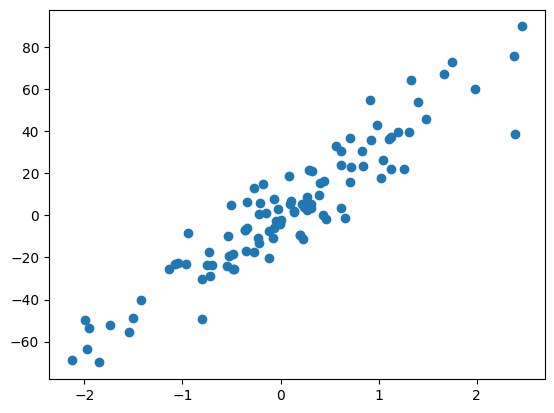

In [4]:
plt.scatter(x,y)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
li=LinearRegression()


In [7]:
li.fit(x,y)

LinearRegression()

In [8]:
print(li.coef_)
print(li.intercept_)

[30.7961586]
0.6336498130509831


from sklearn.linear_model import Ridge

In [9]:
from sklearn.linear_model import Ridge

In [10]:
r=Ridge(alpha=10)
r.fit(x,y)
print(r.coef_)
print(r.intercept_)

[27.82115962]
0.8699143041884643


In [11]:
r1=Ridge(alpha=100)
r1.fit(x,y)
print(r1.coef_)
print(r1.intercept_)

[14.88219104]
1.8974840104412232


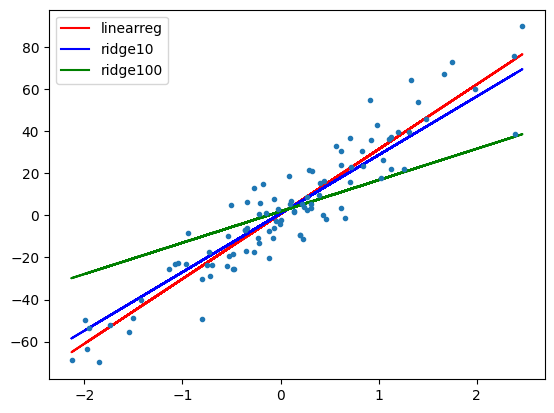

In [12]:
plt.plot(x,li.predict(x),color='r',label='linearreg')
plt.plot(x,r.predict(x),color='b',label='ridge10')
plt.plot(x,r1.predict(x),color='g',label='ridge100')
plt.plot(x,y,'.')
plt.legend()
plt.show()

In [13]:
class MeraRidge:
    
    def __init__(self,alpha=0.1):
        self.alpha = alpha
        self.m = None
        self.b = None
        
    def fit(self,X_train,y_train):
        
        num = 0
        den = 0
        
        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean())*(X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean())
        
        self.m = num/(den + self.alpha)
        self.b = y_train.mean() - (self.m*X_train.mean())
        print(self.m,self.b)
    
    def predict(X_test):
        pass
        
        

In [14]:
mr=MeraRidge(100)
mr.fit(x,y)

[14.88219104] [1.89748401]


### ridge regression in n dimensional data

In [60]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [61]:
X,y = load_diabetes(return_X_y=True)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)

In [64]:
from sklearn.linear_model import Ridge

In [65]:
reg = Ridge(alpha=0.1,solver='cholesky')

In [66]:
reg.fit(X_train,y_train)

Ridge(alpha=0.1, solver='cholesky')

In [67]:
y_pred = reg.predict(X_test)
r2_score(y_test,y_pred)

0.4693128853309805

In [68]:
print(reg.coef_)
print(reg.intercept_)

[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.89053425602808


In [69]:
class MeraRidge:
    
    def __init__(self,alpha=0.1):
        
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self,X_train,y_train):
        
        X_train = np.insert(X_train,0,1,axis=1)
        I = np.identity(X_train.shape[1])
        I[0][0] = 0
        result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)
        self.intercept_ = result[0]
        self.coef_ = result[1:]
    
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [70]:
reg = MeraRidge()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))
print(reg.coef_)
print(reg.intercept_)

0.4693128853309805
[  44.02063391 -241.69329987  452.98665299  332.04420177  -76.33686744
  -68.52143809 -164.98809083  149.96908118  431.61347417   58.51862681]
150.8905342560281
